In [ ]:
import numpy as np
import tensorflow as tf
import keras
import cv2
from sklearn.metrics import accuracy_score
from keras.layers import MaxPool2D,Conv2D,UpSampling2D,Input,Dropout
from keras.models import Sequential
from tensorflow.keras.utils import img_to_array
import os
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
from natsort import natsorted
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
# to get the files in proper order
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)
# defining the size of the image
SIZE = 160
color_img = []
path = '/content/gdrive/MyDrive/imgcolour/landscape Images/color - Copy'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):    
    if i == '1701.jpg':
        break
    else:    
        img = cv2.imread(path + '/'+i,1)
        #img = natsorted(img)
        # open cv reads images in BGR format so we have to convert it to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        color_img.append(img_to_array(img))


gray_img = []
path = '/content/gdrive/MyDrive/imgcolour/landscape Images/gray - Copy'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):
     if i == '1701.jpg':
        break
     else: 
        img = cv2.imread(path + '/'+i,1)
        #img = natsorted(img)
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        gray_img.append(img_to_array(img))

gray = "gray - Copy"
color = "color - Copy"
path = '/content/gdrive/MyDrive/imgcolour/landscape Images'
for c, g in zip(os.listdir(os.path.join(path, color)), os.listdir(os.path.join(path, gray))):
  print(c, g)  

100%|██████████| 1710/1710 [00:04<00:00, 345.40it/s]


1641.jpg 1631.jpg
1630.jpg 162.jpg
1637.jpg 1625.jpg
1633.jpg 163.jpg
1628.jpg 165.jpg
1626.jpg 1629.jpg
1636.jpg 1634.jpg
1640.jpg 1630.jpg
1649.jpg 1636.jpg
1642.jpg 1627.jpg
1647.jpg 1651.jpg
163.jpg 1655.jpg
164.jpg 1640.jpg
165.jpg 1650.jpg
1638.jpg 1632.jpg
1623.jpg 1635.jpg
1645.jpg 1637.jpg
1624.jpg 1648.jpg
1627.jpg 1638.jpg
1634.jpg 1626.jpg
1632.jpg 1641.jpg
1625.jpg 1653.jpg
1643.jpg 1654.jpg
1644.jpg 1628.jpg
1635.jpg 1652.jpg
1672.jpg 1633.jpg
1654.jpg 164.jpg
1679.jpg 1624.jpg
1663.jpg 1644.jpg
1673.jpg 1623.jpg
1666.jpg 167.jpg
1660.jpg 1673.jpg
1671.jpg 1665.jpg
1667.jpg 1667.jpg
166.jpg 1689.jpg
1659.jpg 1663.jpg
1658.jpg 1692.jpg
1665.jpg 1679.jpg
1674.jpg 1659.jpg
1662.jpg 1691.jpg
1669.jpg 1668.jpg
1675.jpg 1664.jpg
1664.jpg 1688.jpg
1656.jpg 1672.jpg
1678.jpg 1658.jpg
167.jpg 1680.jpg
1653.jpg 1690.jpg
1655.jpg 1685.jpg
1670.jpg 1661.jpg
1661.jpg 1656.jpg
1677.jpg 1686.jpg
1676.jpg 169.jpg
1652.jpg 1666.jpg
1668.jpg 1657.jpg
1651.jpg 1676.jpg
1657.jpg 1660.jpg
169

In [ ]:
color_img = []
gray_img = []
c_list = []
g_list = []
SIZE = 160
gray = "gray - Copy"
color = "color - Copy"
path = '/content/gdrive/MyDrive/imgcolour/landscape Images'
for i in range(len(os.listdir(os.path.join(path, color)))):
    cimg = cv2.imread(os.path.join(path,color,f"{i}.jpg"),1)
    gimg = cv2.imread(os.path.join(path,gray,f"{i}.jpg"),1)
    cimg = cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB)

    #resizing image
    cimg = cv2.resize(cimg, (SIZE, SIZE))
    gimg = cv2.resize(gimg, (SIZE, SIZE))

    cimg = cimg.astype('float32') / 255.0
    gimg = gimg.astype('float32') / 255.0

    color_img.append(img_to_array(cimg))
    gray_img.append(img_to_array(gimg))

    c_list.append(i)
    g_list.append(i)

print(len(color_img), len(gray_img))
print(c_list, g_list)

1701 1701
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

In [ ]:
range(len(c))

range(0, 8)

In [ ]:
# defining function to plot images pair
def plot_images(color,grayscale):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('Color Image', color = 'green', fontsize = 20)
    plt.imshow(color)
    plt.subplot(1,3,2)
    plt.title('Grayscale Image ', color = 'black', fontsize = 20)
    plt.imshow(grayscale)
   
    plt.show()

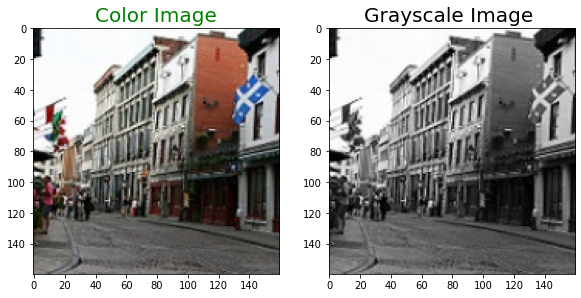

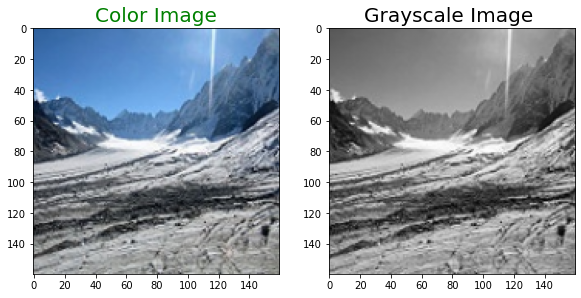

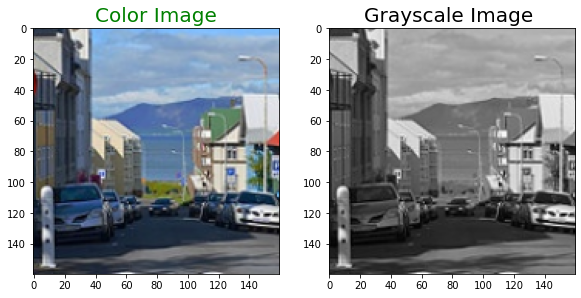

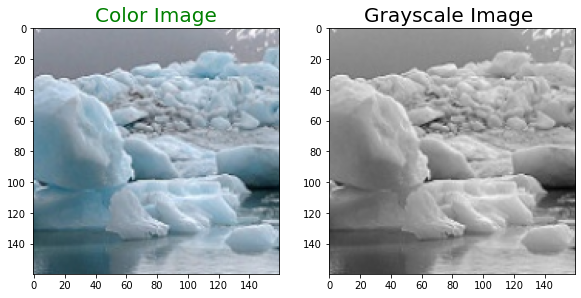

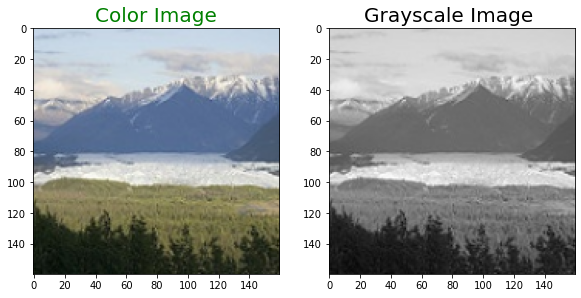

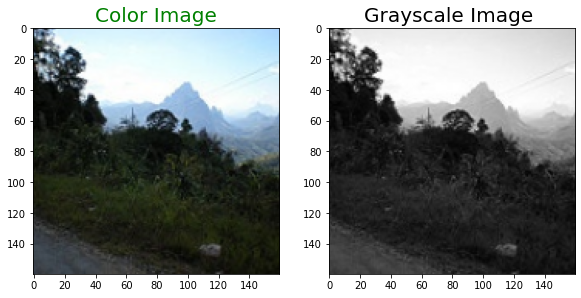

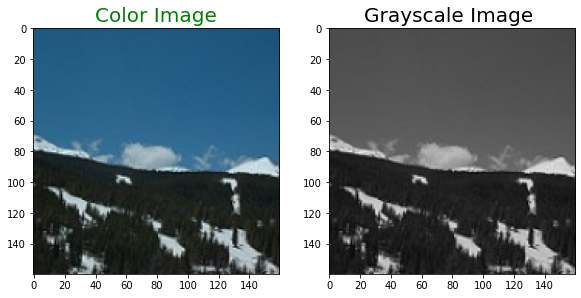

In [ ]:
for i in range(3,10):
     plot_images(color_img[i],gray_img[i])

In [ ]:
train_gray_image = gray_img[:1000]
train_color_image = color_img[:1000]

test_gray_image = gray_img[1000:]
test_color_image = color_img[1000:]
# reshaping
train_g = np.reshape(train_gray_image,(len(train_gray_image),SIZE,SIZE,3))
train_c = np.reshape(train_color_image, (len(train_color_image),SIZE,SIZE,3))
print('Train color image shape:',train_c.shape)


test_gray_image = np.reshape(test_gray_image,(len(test_gray_image),SIZE,SIZE,3))
test_color_image = np.reshape(test_color_image, (len(test_color_image),SIZE,SIZE,3))
print('Test color image shape',test_color_image.shape)

Train color image shape: (1000, 160, 160, 3)
Test color image shape (701, 160, 160, 3)


In [ ]:
from keras import layers
def down(filters , kernel_size, apply_batch_normalization = True):
    downsample = tf.keras.models.Sequential()
    downsample.add(layers.Conv2D(filters,kernel_size,padding = 'same', strides = 2))
    if apply_batch_normalization:
        downsample.add(layers.BatchNormalization())
    downsample.add(keras.layers.LeakyReLU())
    return downsample


def up(filters, kernel_size, dropout = False):
    upsample = tf.keras.models.Sequential()
    upsample.add(layers.Conv2DTranspose(filters, kernel_size,padding = 'same', strides = 2))
    if dropout:
        upsample.dropout(0.2)
    upsample.add(keras.layers.LeakyReLU())
    return upsample
# def model():
#     inputs = layers.Input(shape= [256,256,3])
#     d1 = down(64,(3,3),False)(inputs)
#     d2 = down(64,(3,3),False)(d1)
#     d3 = down(128,(3,3),True)(d2)
#     d4 = down(256,(3,3),True)(d3)
#     d5 = down(256,(3,3),True)(d4)
#     #d6 = down(512,(3,3),True)(d5)
#     #d7 = down(512,(3,3),True)(d6)
#     #upsampling
#     #u1 = up(512,(3,3),False)(d7)
#     #u1 = layers.concatenate([u1,d4])
#     u1 = up(256,(3,3),False)(d5)
#     u1 = layers.concatenate([u1,d4])
#     u2 = up(128,(3,3),False)(u1)
#     u2 = layers.concatenate([u2,d3])
#     u3 = up(64,(3,3),False)(u2)
#     u3 = layers.concatenate([u3,d2])
#     u4 = up(64,(3,3),False)(u3)
#     u4 = layers.concatenate([u4,d1])
#     u5 = up(3,(3,3),False)(u4)
#     u5 = layers.concatenate([u5,inputs])
#     output = layers.Conv2D(3,(2,2),strides = 1, padding = 'same')(u5)
#     return tf.keras.Model(inputs=inputs, outputs=output)
def model():
   inputs = layers.Input(shape= [160,160,3])
   d1 = down(128,(3,3),False)(inputs)
   d2 = down(128,(3,3),False)(d1)
   d3 = down(256,(3,3),True)(d2)
   d4 = down(512,(3,3),True)(d3)
    
   d5 = down(512,(3,3),True)(d4)
   #upsampling
   u1 = up(512,(3,3),False)(d5)
   u1 = layers.concatenate([u1,d4])
   u2 = up(256,(3,3),False)(u1)
   u2 = layers.concatenate([u2,d3])
   u3 = up(128,(3,3),False)(u2)
   u3 = layers.concatenate([u3,d2])
   u4 = up(128,(3,3),False)(u3)
   u4 = layers.concatenate([u4,d1])
   u5 = up(3,(3,3),False)(u4)
   u5 = layers.concatenate([u5,inputs])
   output = layers.Conv2D(3,(2,2),strides = 1, padding = 'same')(u5)
   return tf.keras.Model(inputs=inputs, outputs=output)

In [ ]:
model = model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 80, 80, 128)  3584        ['input_1[0][0]']                
                                                                                                  
 sequential_1 (Sequential)      (None, 40, 40, 128)  147584      ['sequential[0][0]']             
                                                                                                  
 sequential_2 (Sequential)      (None, 20, 20, 256)  296192      ['sequential_1[0][0]']       

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_absolute_error',
              metrics = ['accuracy'])
history = model.fit(train_g, train_c, epochs = 75,batch_size = 25,verbose = 2, validation_data=(test_gray_image, test_color_image))

Epoch 1/75
40/40 - 17s - loss: 0.2031 - accuracy: 0.3325 - val_loss: 0.1003 - val_accuracy: 0.3990 - 17s/epoch - 413ms/step
Epoch 2/75
40/40 - 6s - loss: 0.0871 - accuracy: 0.4005 - val_loss: 0.0875 - val_accuracy: 0.3809 - 6s/epoch - 151ms/step
Epoch 3/75
40/40 - 6s - loss: 0.0774 - accuracy: 0.4162 - val_loss: 0.0768 - val_accuracy: 0.4254 - 6s/epoch - 152ms/step
Epoch 4/75
40/40 - 6s - loss: 0.0712 - accuracy: 0.4213 - val_loss: 0.0722 - val_accuracy: 0.4575 - 6s/epoch - 153ms/step
Epoch 5/75
40/40 - 6s - loss: 0.0672 - accuracy: 0.4355 - val_loss: 0.0763 - val_accuracy: 0.2641 - 6s/epoch - 155ms/step
Epoch 6/75
40/40 - 6s - loss: 0.0646 - accuracy: 0.4475 - val_loss: 0.0663 - val_accuracy: 0.3753 - 6s/epoch - 155ms/step
Epoch 7/75
40/40 - 6s - loss: 0.0611 - accuracy: 0.4552 - val_loss: 0.0705 - val_accuracy: 0.4793 - 6s/epoch - 157ms/step
Epoch 8/75
40/40 - 6s - loss: 0.0585 - accuracy: 0.4627 - val_loss: 0.0678 - val_accuracy: 0.4922 - 6s/epoch - 156ms/step
Epoch 9/75
40/40 - 6s 

In [ ]:
print(len(test_gray_image), len(test_color_image))
test_gray_image[0:20]

701 701


array([[[[0.85490197, 0.85490197, 0.85490197],
         [0.827451  , 0.827451  , 0.827451  ],
         [0.80784315, 0.80784315, 0.80784315],
         ...,
         [0.7529412 , 0.7529412 , 0.7529412 ],
         [0.7490196 , 0.7490196 , 0.7490196 ],
         [0.74509805, 0.74509805, 0.74509805]],

        [[0.85490197, 0.85490197, 0.85490197],
         [0.84705883, 0.84705883, 0.84705883],
         [0.8392157 , 0.8392157 , 0.8392157 ],
         ...,
         [0.7490196 , 0.7490196 , 0.7490196 ],
         [0.74509805, 0.74509805, 0.74509805],
         [0.7411765 , 0.7411765 , 0.7411765 ]],

        [[0.8745098 , 0.8745098 , 0.8745098 ],
         [0.87058824, 0.87058824, 0.87058824],
         [0.85882354, 0.85882354, 0.85882354],
         ...,
         [0.7490196 , 0.7490196 , 0.7490196 ],
         [0.74509805, 0.74509805, 0.74509805],
         [0.7411765 , 0.7411765 , 0.7411765 ]],

        ...,

        [[0.21568628, 0.21568628, 0.21568628],
         [0.22352941, 0.22352941, 0.22352941]

In [ ]:
#test_gray_image = np.reshape(test_gray_image,500)
model.evaluate(test_gray_image,test_color_image)

22/22 [==============================] - 3s 98ms/step - loss: 0.0481 - accuracy: 0.4793


[0.04811453819274902, 0.47933104634284973]

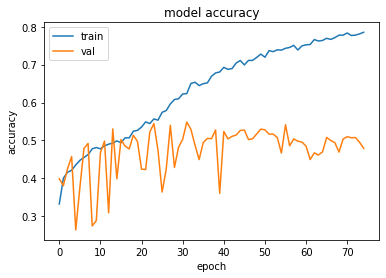

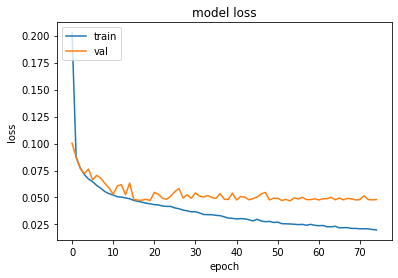

In [ ]:
import keras
from matplotlib import pyplot as plt

#history = model.fit(train_g, train_c, epochs = 50,batch_size = 25,verbose = 0)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 212ms/step


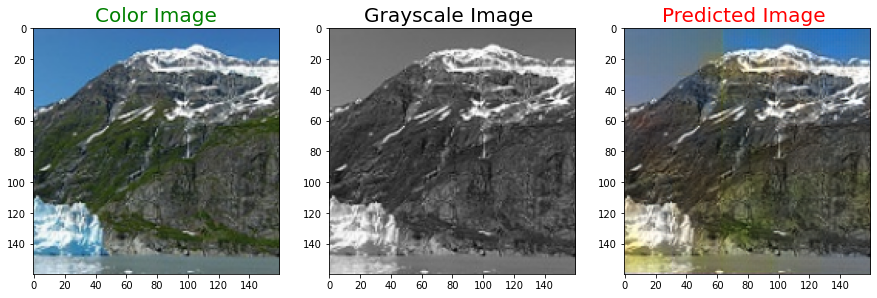

1/1 [==============================] - 0s 21ms/step


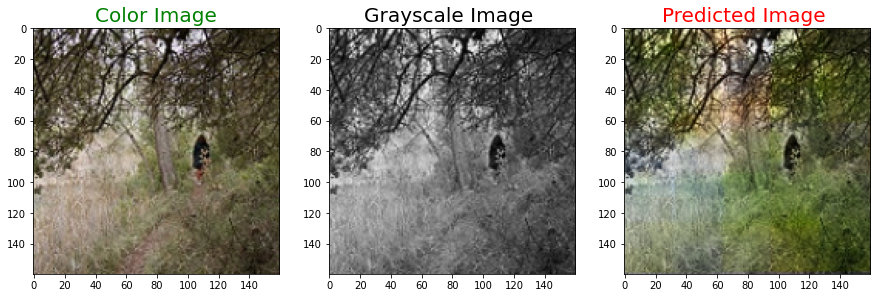

1/1 [==============================] - 0s 36ms/step


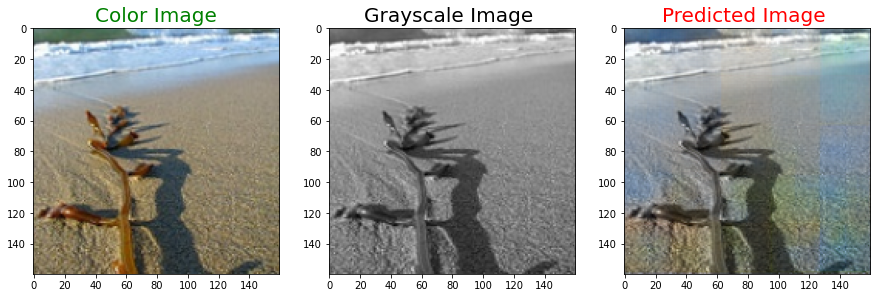

1/1 [==============================] - 0s 24ms/step


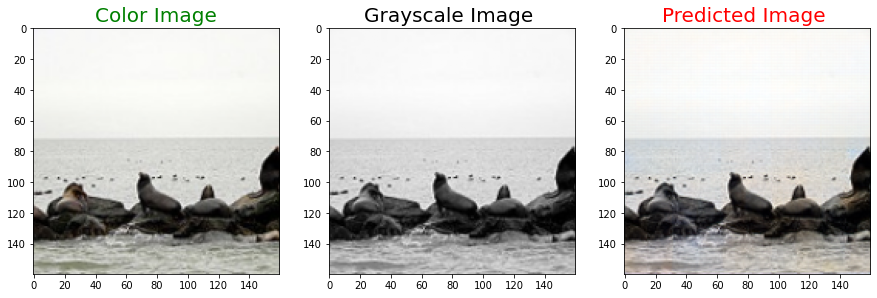

1/1 [==============================] - 0s 27ms/step


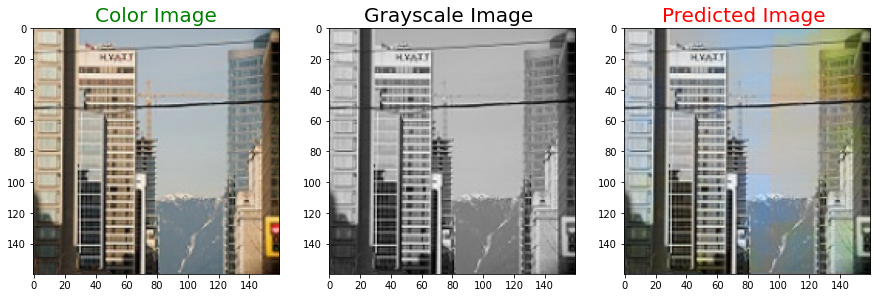

1/1 [==============================] - 0s 23ms/step


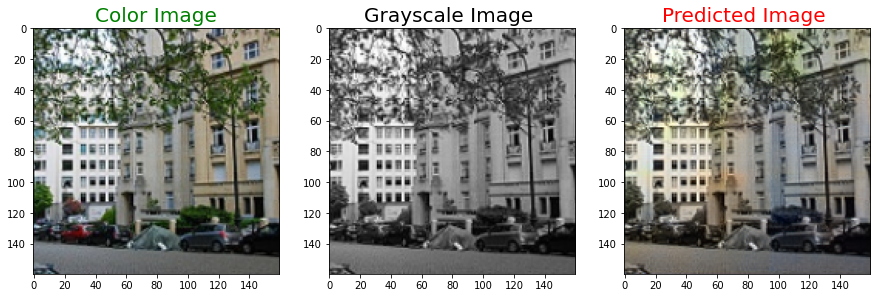

1/1 [==============================] - 0s 23ms/step


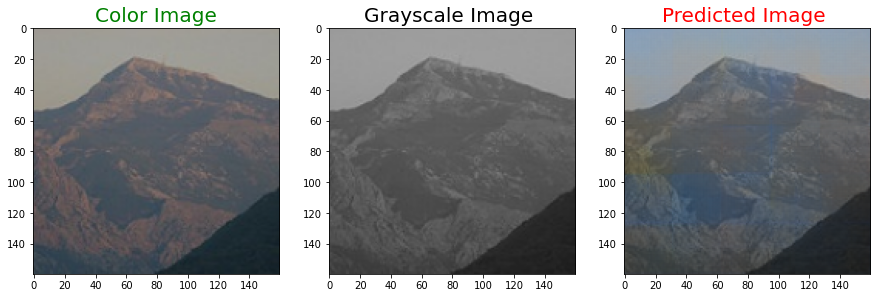

1/1 [==============================] - 0s 22ms/step


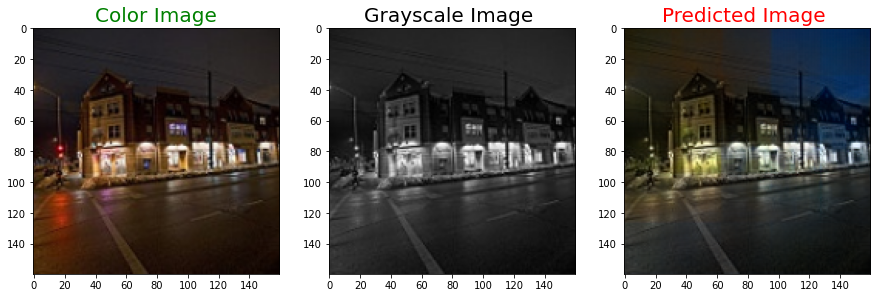

In [ ]:
# defining function to plot images pair
def plot_images(color,grayscale,predicted):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('Color Image', color = 'green', fontsize = 20)
    plt.imshow(color)
    plt.subplot(1,3,2)
    plt.title('Grayscale Image ', color = 'black', fontsize = 20)
    plt.imshow(grayscale)
    plt.subplot(1,3,3)
    plt.title('Predicted Image ', color = 'Red', fontsize = 20)
    plt.imshow(predicted)
   
    plt.show()

for i in range(50,58):
    predicted = np.clip(model.predict(test_gray_image[i].reshape(1,SIZE, SIZE,3)),0.0,1.0).reshape(SIZE, SIZE,3)
    plot_images(test_color_image[i],test_gray_image[i],predicted)